In [1]:
import neo
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
import seaborn as sns

## Loadning of data

### 2D data

In [2]:
# List of filenames for each eye
filenames_2D = [
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 1/10Hz_1V_neg500mV_1ms005.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 2/10Hz_1V_neg500mV_1ms007.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 3/10Hz_1V_neg500mV_1ms007.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 4/10Hz_1V_neg500mV_1ms.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 5/10Hz_1V_neg500mV_1ms002.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 6/10Hz_1V_neg500mV_1ms005.ns5"
]


# Initialize an empty list to hold the data from all eyes
all_data_2D = []
filtered_data = []

# Parameters for the low-pass filter
fs = 30000  # Sampling frequency (Hz)
cutoff_frequency = 50  # Cutoff frequency for the low-pass filter (Hz)

# Loop through each file and read the data
for filename in filenames_2D:
    print(f"Reading data from file: {filename}")
    reader = neo.io.BlackrockIO(filename=filename)
    
    # Read the data from the file
    block_SA = reader.read_block()
    
    # Access the first segment
    segment_SA = block_SA.segments[0]
    
    # Access the first analog signal within this segment
    analog_signal_SA = segment_SA.analogsignals[0]
    
    # Access the signal data as a NumPy array and append it to the list
    data_SA = np.asarray(analog_signal_SA.magnitude)
    all_data_2D.append(data_SA)

all_data_2D = np.array(all_data_2D)
all_data_2D = np.transpose(all_data_2D, (0, 2, 1)) 
average_per_eye_2D = np.mean(all_data_2D, axis=1)
# Print shape of the data
print(f"Data shape: {np.shape(all_data_2D)}")
print(f"Data shape: {np.shape(average_per_eye_2D)}")



Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 1/10Hz_1V_neg500mV_1ms005.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 2/10Hz_1V_neg500mV_1ms007.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 3/10Hz_1V_neg500mV_1ms007.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 4/10Hz_1V_neg500mV_1ms.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 5/10Hz_1V_neg500mV_1ms002.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 6/10Hz_1V_neg500mV_1ms005.ns5
Data shape: (6, 32, 300300)
Data shape: (6, 300300)


In [3]:
import numpy as np
import neo

# List of filenames for each eye
filenames_2D_TTX = [
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 1/10Hz_1V_neg500mV_1ms_TTX006.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 2/10Hz_1V_neg500mV_1ms_TTX008.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 3/10Hz_1V_neg500mV_1ms_TTX008.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 4/10Hz_1V_neg500mV_1ms_TTX001.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 5/10Hz_1V_neg500mV_1ms_TTX003.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 6/10Hz_1V_neg500mV_1ms_TTX006.ns5"
]

# Initialize an empty list to hold the data from all eyes
all_data_2D_TTX = []
average_per_eye_2D_TTX = []

# Parameters for the low-pass filter
fs = 30000  # Sampling frequency (Hz)
cutoff_frequency = 50  # Cutoff frequency for the low-pass filter (Hz)

# Loop through each file and read the data
for filename in filenames_2D_TTX:
    print(f"Reading data from file: {filename}")
    reader = neo.io.BlackrockIO(filename=filename)
    
    # Read the data from the file
    block_SA = reader.read_block()
    
    # Access the first segment
    segment_SA = block_SA.segments[0]
    
    # Access the first analog signal within this segment
    analog_signal_SA = segment_SA.analogsignals[0]
    
    # Access the signal data as a NumPy array and append it to the list
    data_SA = np.asarray(analog_signal_SA.magnitude)
    all_data_2D_TTX.append(data_SA[:300300])

all_data_2D_TTX = np.array(all_data_2D_TTX)
all_data_2D_TTX = np.transpose(all_data_2D_TTX, (0, 2, 1)) 
average_per_eye_2D_TTX = np.mean(all_data_2D_TTX, axis=1)
# Print shape of the data
print(f"Data shape: {np.shape(all_data_2D_TTX)}")
print(f"Data shape: {np.shape(average_per_eye_2D_TTX)}")


Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 1/10Hz_1V_neg500mV_1ms_TTX006.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 2/10Hz_1V_neg500mV_1ms_TTX008.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 3/10Hz_1V_neg500mV_1ms_TTX008.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 4/10Hz_1V_neg500mV_1ms_TTX001.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 5/10Hz_1V_neg500mV_1ms_TTX003.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 6/10Hz_1V_neg500mV_1ms_TTX006.ns5
Data shape: (6, 32, 300300)
Data shape: (6, 300300)


In [4]:
# List of filenames for each eye
filenames_2D_no_stim = [
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 1/NO_STIM_NO_GEN004.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 2/NO_STIM_NO_GEN006.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 3/NO_STIM_NO_GEN006.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 4/NO_STIM_NO_GEN001.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 5/NO_STIM_NO_GEN001.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/2D/Eye 6/NO_STIM_NO_GEN004.ns5"
]


# Initialize an empty list to hold the data from all eyes
all_data_2D_no_stim = []
filtered_data = []

# Parameters for the low-pass filter
fs = 30000  # Sampling frequency (Hz)
cutoff_frequency = 50  # Cutoff frequency for the low-pass filter (Hz)

# Loop through each file and read the data
for filename in filenames_2D_no_stim:
    print(f"Reading data from file: {filename}")
    reader = neo.io.BlackrockIO(filename=filename)
    
    # Read the data from the file
    block_SA = reader.read_block()
    
    # Access the first segment
    segment_SA = block_SA.segments[0]
    
    # Access the first analog signal within this segment
    analog_signal_SA = segment_SA.analogsignals[0]
    
    # Access the signal data as a NumPy array and append it to the list
    data_SA = np.asarray(analog_signal_SA.magnitude)
    all_data_2D_no_stim.append(data_SA)

all_data_2D_no_stim = np.array(all_data_2D_no_stim)
all_data_2D_no_stim = np.transpose(all_data_2D_no_stim, (0, 2, 1)) 
average_per_eye_2D_no_stim = np.mean(all_data_2D_no_stim, axis=1)
# Print shape of the data
print(f"Data shape: {np.shape(all_data_2D_no_stim)}")
print(f"Data shape: {np.shape(average_per_eye_2D_no_stim)}")



Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 1/NO_STIM_NO_GEN004.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 2/NO_STIM_NO_GEN006.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 3/NO_STIM_NO_GEN006.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 4/NO_STIM_NO_GEN001.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 5/NO_STIM_NO_GEN001.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/2D/Eye 6/NO_STIM_NO_GEN004.ns5
Data shape: (6, 32, 300300)
Data shape: (6, 300300)


/var/folders/4r/ky8lg5_521vcwh4ltvn3c2300000gn/T/ipykernel_28086/91499637.py:49: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper left')
/var/folders/4r/ky8lg5_521vcwh4ltvn3c2300000gn/T/ipykernel_28086/91499637.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax_inset.legend(loc='upper left')
/var/folders/4r/ky8lg5_521vcwh4ltvn3c2300000gn/T/ipykernel_28086/91499637.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


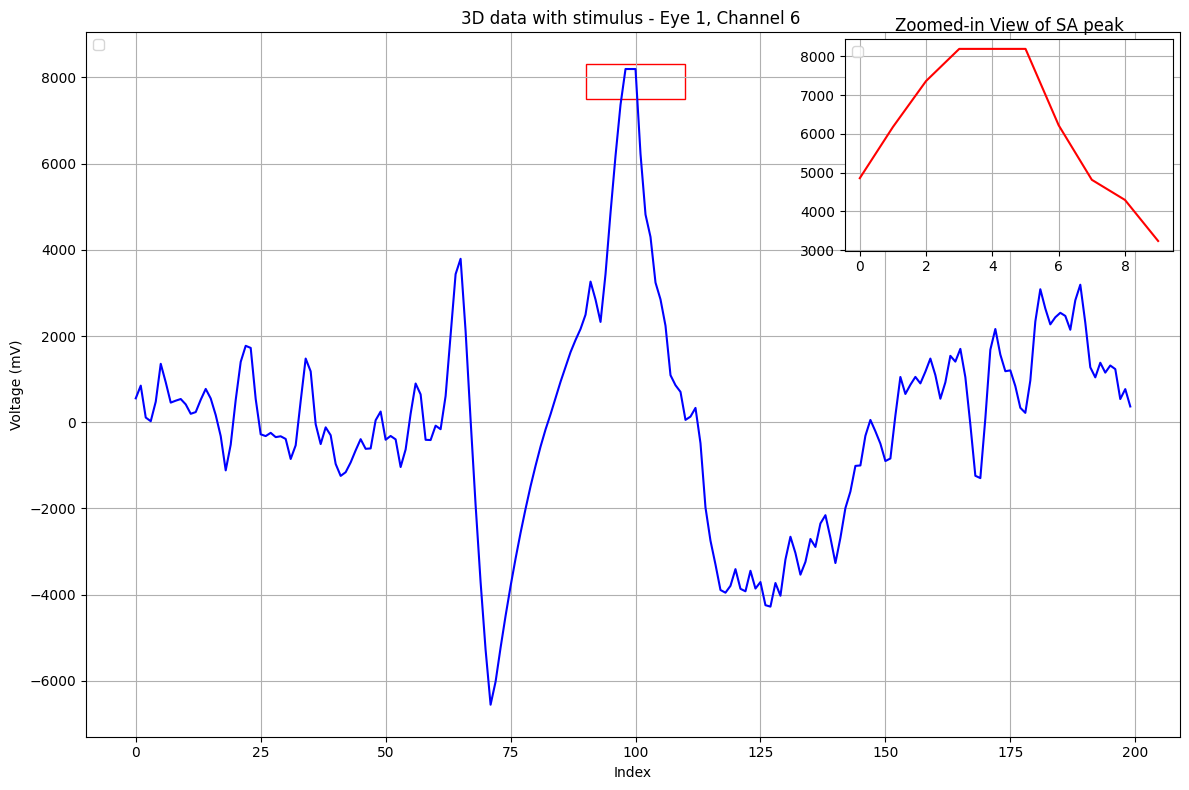

In [98]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Rectangle

# Assuming all_data_3D is already defined and contains the data
eye_data = all_data_3D[0]  # Select eye 1
channel_data = eye_data[5, :]  # Select channel 6

# Define the main index
main_index = 75963

# Define the ranges for both plots
range_300 = slice(main_index - 100, main_index + 100)  # 300 data points around index 75950
range_20 = slice(main_index - 5, main_index + 5)     # 20 data points around index 75950

# Create the figure
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the first 300 data points
ax.plot(channel_data[range_300], color='b')
ax.set_title('3D data with stimulus - Eye 1, Channel 6 ')
ax.set_xlabel('Index')
ax.set_ylabel('Voltage (mV)')

# Create an inset for the zoomed-in view
ax_inset = inset_axes(ax, width="30%", height="30%", loc='upper right')  # Adjust location and size

# Plot the zoomed-in version for 20 data points
ax_inset.plot(channel_data[range_20], color='r')
ax_inset.set_title('Zoomed-in View of SA peak')

# Define the position, width, and height of the rectangle
rectangle_position = (90, 7500)  # Bottom-left corner (x, y)
rectangle_width = 20             # Width of the rectangle
rectangle_height = 800             # Height of the rectangle

# Create a rectangle
rectangle = Rectangle(rectangle_position, rectangle_width, rectangle_height, 
                      fc ='none', edgecolor='red', linewidth=1, alpha=1)  # alpha for transparency

# Add the rectangle to the plot
ax.add_patch(rectangle)


# Add grid and legend
ax.grid(True)
ax_inset.grid(True)
ax.legend(loc='upper left')
ax_inset.legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


### 3D data

In [10]:
# List of filenames for each eye
filenames_3D = [
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 1/10Hz_1V_neg500mV_1ms003.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 2/10Hz_1V_neg500mV_1ms002.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 3/10Hz_1V_neg500mV_1ms004.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 4/10Hz_1V_neg500mV_1ms018.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 5/10Hz_1V_neg500mV_1ms004.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 6/10Hz_1V_neg500mV_1ms011.ns5"
]

# Initialize an empty list to hold the data from all eyes
all_data_3D = []
filtered_data = []

# Parameters for the low-pass filter
fs = 30000  # Sampling frequency (Hz)
cutoff_frequency = 50  # Cutoff frequency for the low-pass filter (Hz)

# Loop through each file and read the data
for filename in filenames_3D:
    print(f"Reading data from file: {filename}")
    reader = neo.io.BlackrockIO(filename=filename)
    
    # Read the data from the file
    block_SA = reader.read_block()
    
    # Access the first segment
    segment_SA = block_SA.segments[0]
    
    # Access the first analog signal within this segment
    analog_signal_SA = segment_SA.analogsignals[0]
    
    # Access the signal data as a NumPy array and append it to the list
    data_SA = np.asarray(analog_signal_SA.magnitude)
    all_data_3D.append(data_SA)

all_data_3D = np.array(all_data_3D)
all_data_3D = np.transpose(all_data_3D, (0, 2, 1)) 
average_per_eye_3D = np.mean(all_data_3D, axis=1)
# Print shape of the data
print(f"Data shape: {np.shape(all_data_3D)}")
print(f"Data shape: {np.shape(average_per_eye_3D)}")


Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 1/10Hz_1V_neg500mV_1ms003.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 2/10Hz_1V_neg500mV_1ms002.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 3/10Hz_1V_neg500mV_1ms004.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 4/10Hz_1V_neg500mV_1ms018.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 5/10Hz_1V_neg500mV_1ms004.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 6/10Hz_1V_neg500mV_1ms011.ns5
Data shape: (6, 32, 300300)
Data shape: (6, 300300)


In [11]:
# List of filenames for each eye
filenames_3D_TTX = [
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 1/10Hz_1V_neg500mV_1ms_TTX007.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 2/10Hz_1V_neg500mV_1ms_TTX004.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 3/10Hz_1V_neg500mV_1ms_TTX007.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 4/10Hz_1V_neg500mV_1ms_TTX020.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 5/10Hz_1V_neg500mV_1ms_TTX005.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 6/10Hz_1V_neg500mV_1ms_TTX012.ns5"
]

# Initialize an empty list to hold the data from all eyes
all_data_3D_TTX = []
filtered_data_TTX = []

# Parameters for the low-pass filter
fs = 30000  # Sampling frequency (Hz)
cutoff_frequency = 50  # Cutoff frequency for the low-pass filter (Hz)

# Loop through each file and read the data
for filename in filenames_3D_TTX:
    print(f"Reading data from file: {filename}")
    reader = neo.io.BlackrockIO(filename=filename)
    
    # Read the data from the file
    block_SA = reader.read_block()
    
    # Access the first segment
    segment_SA = block_SA.segments[0]
    
    # Access the first analog signal within this segment
    analog_signal_SA = segment_SA.analogsignals[0]
    
    # Access the signal data as a NumPy array and append it to the list
    data_SA = np.asarray(analog_signal_SA.magnitude)
    all_data_3D_TTX.append(data_SA)

all_data_3D_TTX = np.array(all_data_3D_TTX)
all_data_3D_TTX = np.transpose(all_data_3D_TTX, (0, 2, 1)) 
average_per_eye_3D_TTX = np.mean(all_data_3D_TTX, axis=1)
# Print shape of the data
print(f"Data shape: {np.shape(all_data_3D_TTX)}")
print(f"Data shape: {np.shape(average_per_eye_3D_TTX)}")


Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 1/10Hz_1V_neg500mV_1ms_TTX007.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 2/10Hz_1V_neg500mV_1ms_TTX004.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 3/10Hz_1V_neg500mV_1ms_TTX007.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 4/10Hz_1V_neg500mV_1ms_TTX020.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 5/10Hz_1V_neg500mV_1ms_TTX005.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 6/10Hz_1V_neg500mV_1ms_TTX012.ns5
Data shape: (6, 32, 300300)
Data shape: (6, 300300)


In [12]:
# List of filenames for each eye
filenames_3D_no_stim = [
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 1/NO_STIM_NO_GEN002.ns5.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 2/NO_STIM_NO_GEN001.ns5.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 3/NO_STIM_NO_GEN001.ns5.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 4/NO_STIM_NO_GEN016.ns5.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 5/NO_STIM_NO_GEN001.ns5",
    "/Users/marielunde/Desktop/Thesis/all data/3D/Eye 6/NO_STIM_NO_GEN007.ns5"
]

# Initialize an empty list to hold the data from all eyes
all_data_3D_no_stim = []
filtered_data_no_stim = []

# Parameters for the low-pass filter
fs = 30000  # Sampling frequency (Hz)
cutoff_frequency = 50  # Cutoff frequency for the low-pass filter (Hz)

# Loop through each file and read the data
for filename in filenames_3D_no_stim:
    print(f"Reading data from file: {filename}")
    reader = neo.io.BlackrockIO(filename=filename)
    
    # Read the data from the file
    block_SA = reader.read_block()
    
    # Access the first segment
    segment_SA = block_SA.segments[0]
    
    # Access the first analog signal within this segment
    analog_signal_SA = segment_SA.analogsignals[0]
    
    # Access the signal data as a NumPy array and append it to the list
    data_SA = np.asarray(analog_signal_SA.magnitude)
    all_data_3D_no_stim.append(data_SA)

all_data_3D_no_stim = np.array(all_data_3D_no_stim)
all_data_3D_no_stim = np.transpose(all_data_3D_no_stim, (0, 2, 1)) 
average_per_eye_3D_no_stim = np.mean(all_data_3D_no_stim, axis=1)
# Print shape of the data
print(f"Data shape: {np.shape(all_data_3D_no_stim)}")
print(f"Data shape: {np.shape(average_per_eye_3D_no_stim)}")


Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 1/NO_STIM_NO_GEN002.ns5.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 2/NO_STIM_NO_GEN001.ns5.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 3/NO_STIM_NO_GEN001.ns5.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 4/NO_STIM_NO_GEN016.ns5.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 5/NO_STIM_NO_GEN001.ns5
Reading data from file: /Users/marielunde/Desktop/Thesis/all data/3D/Eye 6/NO_STIM_NO_GEN007.ns5
Data shape: (6, 32, 300300)
Data shape: (6, 300300)


 ## Overview of data

In [14]:
import numpy as np
import pandas as pd
from scipy import stats

# Assuming your data array is named `data` with shape (6, 32, 300300)
# 6: number of eyes, 32: channels, 300300: time points

# Function to calculate summary statistics for each eye
def summarize_statistics(eye_data):
    stats_summary = {}
    
    # Flatten the data for all channels in an eye to compute statistics across all points
    flattened_data = eye_data.flatten()
    
    # Mean
    stats_summary['Mean'] = np.mean(flattened_data)
    
    # Standard Deviation
    stats_summary['Standard Deviation'] = np.std(flattened_data)
    
    # Minimum and Maximum (Range)
    stats_summary['Min'] = np.min(flattened_data)
    stats_summary['Max'] = np.max(flattened_data)
    
    # Median
    stats_summary['Median'] = np.median(flattened_data)
    
    # IQR (Interquartile Range)
    stats_summary['IQR'] = stats.iqr(flattened_data)
    
    # Kurtosis
    stats_summary['Kurtosis'] = stats.kurtosis(flattened_data, fisher=True)
    
    # Skewness
    stats_summary['Skewness'] = stats.skew(flattened_data)
    
    return stats_summary

# List to store summary statistics for all eyes
summary_stats = []

# Iterate over each eye (axis 0 of the array)
for eye_index in range(all_data_2D_no_stim.shape[0]):
    eye_data = all_data_2D_no_stim[eye_index, :, :]  # Get data for this specific eye (all channels, all time points)
    stats_summary = summarize_statistics(eye_data)
    summary_stats.append(stats_summary)

# Calculate overall statistics by flattening all eyes' data
all_eyes_data = all_data_2D_no_stim.flatten()
overall_stats = summarize_statistics(all_eyes_data)
summary_stats.append(overall_stats)  # Add overall statistics as the last row

# Convert summary stats to a DataFrame for easier viewing
summary_df = pd.DataFrame(summary_stats, index=[f'Eye {i+1}' for i in range(all_data_2D_no_stim.shape[0])] + ['Overall Average'])
print(summary_df)


                     Mean  Standard Deviation     Min     Max  Median    IQR  \
Eye 1            0.000266           10.009051  -73.75   66.00    0.00  11.75   
Eye 2           -0.000536           14.003461 -892.75  696.25    0.00  11.00   
Eye 3           -0.000536           14.003461 -892.75  696.25    0.00  11.00   
Eye 4            0.001535           17.570904 -307.00  247.25   -0.25  16.00   
Eye 5            0.000224           10.950032 -107.00   95.50    0.00  12.00   
Eye 6            0.000266           10.009051  -73.75   66.00    0.00  11.75   
Overall Average  0.000203           13.046053 -892.75  696.25    0.00  12.00   

                   Kurtosis  Skewness  
Eye 1              1.289382 -0.118526  
Eye 2            422.382912 -0.379595  
Eye 3            422.382912 -0.379595  
Eye 4             11.783500 -0.063914  
Eye 5              2.198077 -0.021695  
Eye 6              1.289382 -0.118526  
Overall Average  194.261016 -0.202457  


In [10]:
# special case of eye 2D TTX
import numpy as np
import pandas as pd
from scipy import stats

# Function to calculate summary statistics for each eye
def summarize_statistics(eye_data):
    stats_summary = {}
    
    # Flatten the data for all channels in an eye to compute statistics across all points
    flattened_data = eye_data.flatten()
    
    # Mean
    stats_summary['Mean'] = np.mean(flattened_data)
    
    # Standard Deviation
    stats_summary['Standard Deviation'] = np.std(flattened_data)
    
    # Minimum and Maximum (Range)
    stats_summary['Min'] = np.min(flattened_data)
    stats_summary['Max'] = np.max(flattened_data)
    
    # Median
    stats_summary['Median'] = np.median(flattened_data)
    
    # IQR (Interquartile Range)
    stats_summary['IQR'] = stats.iqr(flattened_data)
    
    # Kurtosis
    stats_summary['Kurtosis'] = stats.kurtosis(flattened_data, fisher=True)
    
    # Skewness
    stats_summary['Skewness'] = stats.skew(flattened_data)
    
    return stats_summary

# List to store summary statistics for all eyes
summary_stats = []

# Iterate over each eye (individual arrays within all_data_2D_TTX)
for eye_index in range(len(all_data_2D_TTX)):
    eye_data = all_data_2D_TTX[eye_index]  # Get data for this specific eye (channels, varying time points)
    stats_summary = summarize_statistics(eye_data)
    summary_stats.append(stats_summary)

# Flatten all eyes' data for overall statistics, handling varying lengths
all_eyes_data = np.concatenate([eye_data.flatten() for eye_data in all_data_2D_TTX])
overall_stats = summarize_statistics(all_eyes_data)
summary_stats.append(overall_stats)  # Add overall statistics as the last row

# Convert summary stats to a DataFrame for easier viewing
summary_df = pd.DataFrame(summary_stats, index=[f'Eye {i+1}' for i in range(len(all_data_2D_TTX))] + ['Overall Average'])
print(summary_df)


                     Mean  Standard Deviation     Min      Max  Median  \
Eye 1            1.102270          628.391724 -8192.0  6632.50   -1.25   
Eye 2            0.167044          552.751160 -8192.0  7291.25    0.00   
Eye 3            0.167044          552.751160 -8192.0  7291.25    0.00   
Eye 4            0.001835          106.734329 -1273.0  1811.75   -0.25   
Eye 5            0.062400          600.624084 -8192.0  8191.75    0.00   
Eye 6            1.102270          628.391724 -8192.0  6632.50   -1.25   
Overall Average  0.422425          536.661621 -8192.0  8191.75   -0.25   

                    IQR   Kurtosis  Skewness  
Eye 1            113.25  72.562843 -2.231896  
Eye 2             66.25  74.739842 -0.785780  
Eye 3             66.25  74.739842 -0.785780  
Eye 4            119.75  10.275471  0.236735  
Eye 5             82.00  57.658681  0.136800  
Eye 6            113.25  72.562843 -2.231896  
Overall Average   90.50  86.936631 -1.409307  


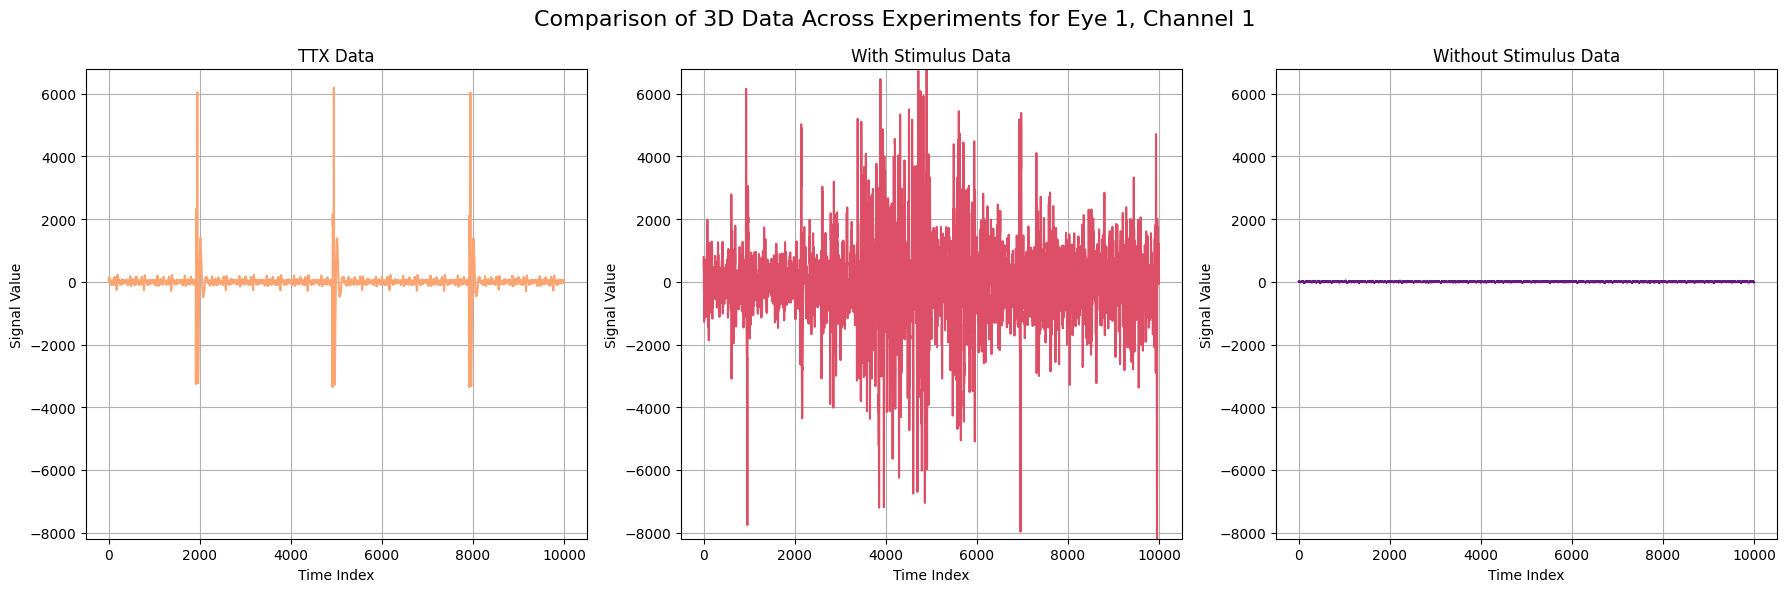

In [13]:

eye_index = 0  # Eye 1
channel_index = 0  # Channel 1

# Get the first 10,000 data points from each dataset
data_ttx = all_data_3D_TTX[eye_index][channel_index, :10000]  # First 10,000 points for TTX condition
data_with_stimulus = all_data_3D[eye_index, channel_index, :10000]  # First 10,000 points for with stimulus
data_without_stimulus = all_data_3D_no_stim[eye_index, channel_index, :10000]  # First 10,000 points for without stimulus

# Define color codes for each plot
color_codes = ['#fca572', '#dd4f66', '#651b7e']  # Color codes for each dataset

# Create a figure with 1x3 grid
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot TTX data
axs[0].plot(data_ttx, color=color_codes[0])
axs[0].set_title('TTX Data')
axs[0].set_xlabel('Time Index')
axs[0].set_ylabel('Signal Value')
axs[0].grid(True)

# Plot data with stimulus
axs[1].plot(data_with_stimulus, color=color_codes[1])
axs[1].set_title('With Stimulus Data')
axs[1].set_xlabel('Time Index')
axs[1].set_ylabel('Signal Value')
axs[1].grid(True)

# Plot data without stimulus
axs[2].plot(data_without_stimulus, color=color_codes[2])
axs[2].set_title('Without Stimulus Data')
axs[2].set_xlabel('Time Index')
axs[2].set_ylabel('Signal Value')
axs[2].grid(True)

# Set the same scale for the y-axis across all plots
y_min = min(data_ttx.min(), data_with_stimulus.min(), data_without_stimulus.min())
y_max = max(data_ttx.max(), data_with_stimulus.max(), data_without_stimulus.max())
for ax in axs:
    ax.set_ylim(y_min, y_max)  # Set same y-limits for all subplots

fig.suptitle('Comparison of 3D Data Across Experiments for Eye 1, Channel 1', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.show()
